In [1]:
import numpy as np
from cmeutils.sampling import is_equilibrated, equil_sample
from cmeutils.structure import gsd_rdf
import unyt as u
from unyt import Unit
import signac
import gsd.hoomd
import matplotlib.pyplot as plt
import os
import grits
import mbuild as mb
import ele


conv_dict = {
    "ca": ele.element_from_symbol("C"),
    "s": ele.element_from_symbol("S"),
    "sh": ele.element_from_symbol("S"),
}

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************

/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/mdtraj/geometry/order.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en

In [4]:
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 1
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 3

In [2]:
project = signac.get_project("../validation/")

In [3]:
def append_first_frame(job):
    fpath = job.fn(f"trajectory-nvt{job.doc.nvt_runs-1}.gsd")

    with gsd.hoomd.open(job.fn("combined-nvt.gsd"), "w") as new_traj:
        with gsd.hoomd.open(job.fn("trajectory-npt0.gsd"), "r") as init_traj:
            new_traj.append(init_traj[0])
        with gsd.hoomd.open(fpath) as nvt_traj:
            for frame in nvt_traj:
                new_traj.append(frame)

# Corase-grain the trajectories:

In [9]:
for kT, jobs in project.find_jobs({"doc.nvt_equilibrated": True}).groupby("kT"):
    for job in jobs:
        if job.isfile("cg-nvt.gsd"):
            continue
        print(job.id)
        append_first_frame(job)
        fpath = job.fn("combined-nvt.gsd")
        bead_mapping = {"A": "c1ccc(S)cc1"}
        cg_system = grits.coarsegrain.CG_System(
            gsdfile=fpath,
            beads=bead_mapping,
            add_hydrogens=job.sp.remove_hydrogens,
            conversion_dict=conv_dict
        )
        cg_system.save(job.fn("cg-nvt.gsd"))
        print()

8c0168a454885f91158683b137eb4e0a
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



2c8f7b80326a4107044f93abf255c176
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



2ec7855f992bf53446f9a3adf393b528
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



0b7749c29415e956b2c63fd81f081334
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



f5da565c388c18868eb3356b3ba04b56
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



da265101b694310d8f3228d10858e512
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



e6fd556282f2ca198ec33729de0988cb
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



4ba943c66884b09b14ae768da5ce9149
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



e6e236135ac867add24f9d4d31ee2741
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



825d861b4c33b56fe804d6f0791b175f
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



8fa6d7ddef1517ec38bbf688c5c0dab5
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



802dc3df87b677ebc2727d9e9ddf530c
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



ce33582b39a1fd612b1e122e43934d46
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



5837f3e64d4c2616b73fa7e9e9d5c80c
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



9142f5e776ff060fb7edb01495a9a86e
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



a5250cea52a262d308592249ce463d10
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



b4e0b9bd36fc145ece5c802c2ee102e5
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



7c0717fd736bb73bdabf5a161eafd1de
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



ddff72030898e479189cd2df660938e3
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



30c2a205adf0c2dfd9b8d0b50599dad8
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



887213b5081db9f0d4bb1b606c0206a4
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \



338bc994b6d6921ed8ac9e872694f264
Added 102 hydrogens.


/home/chrisjones4/miniconda3/envs/jankflow/lib/python3.9/site-packages/gsd/hoomd.py:827: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if matches_default_value \


# Radial Distribution Functions:

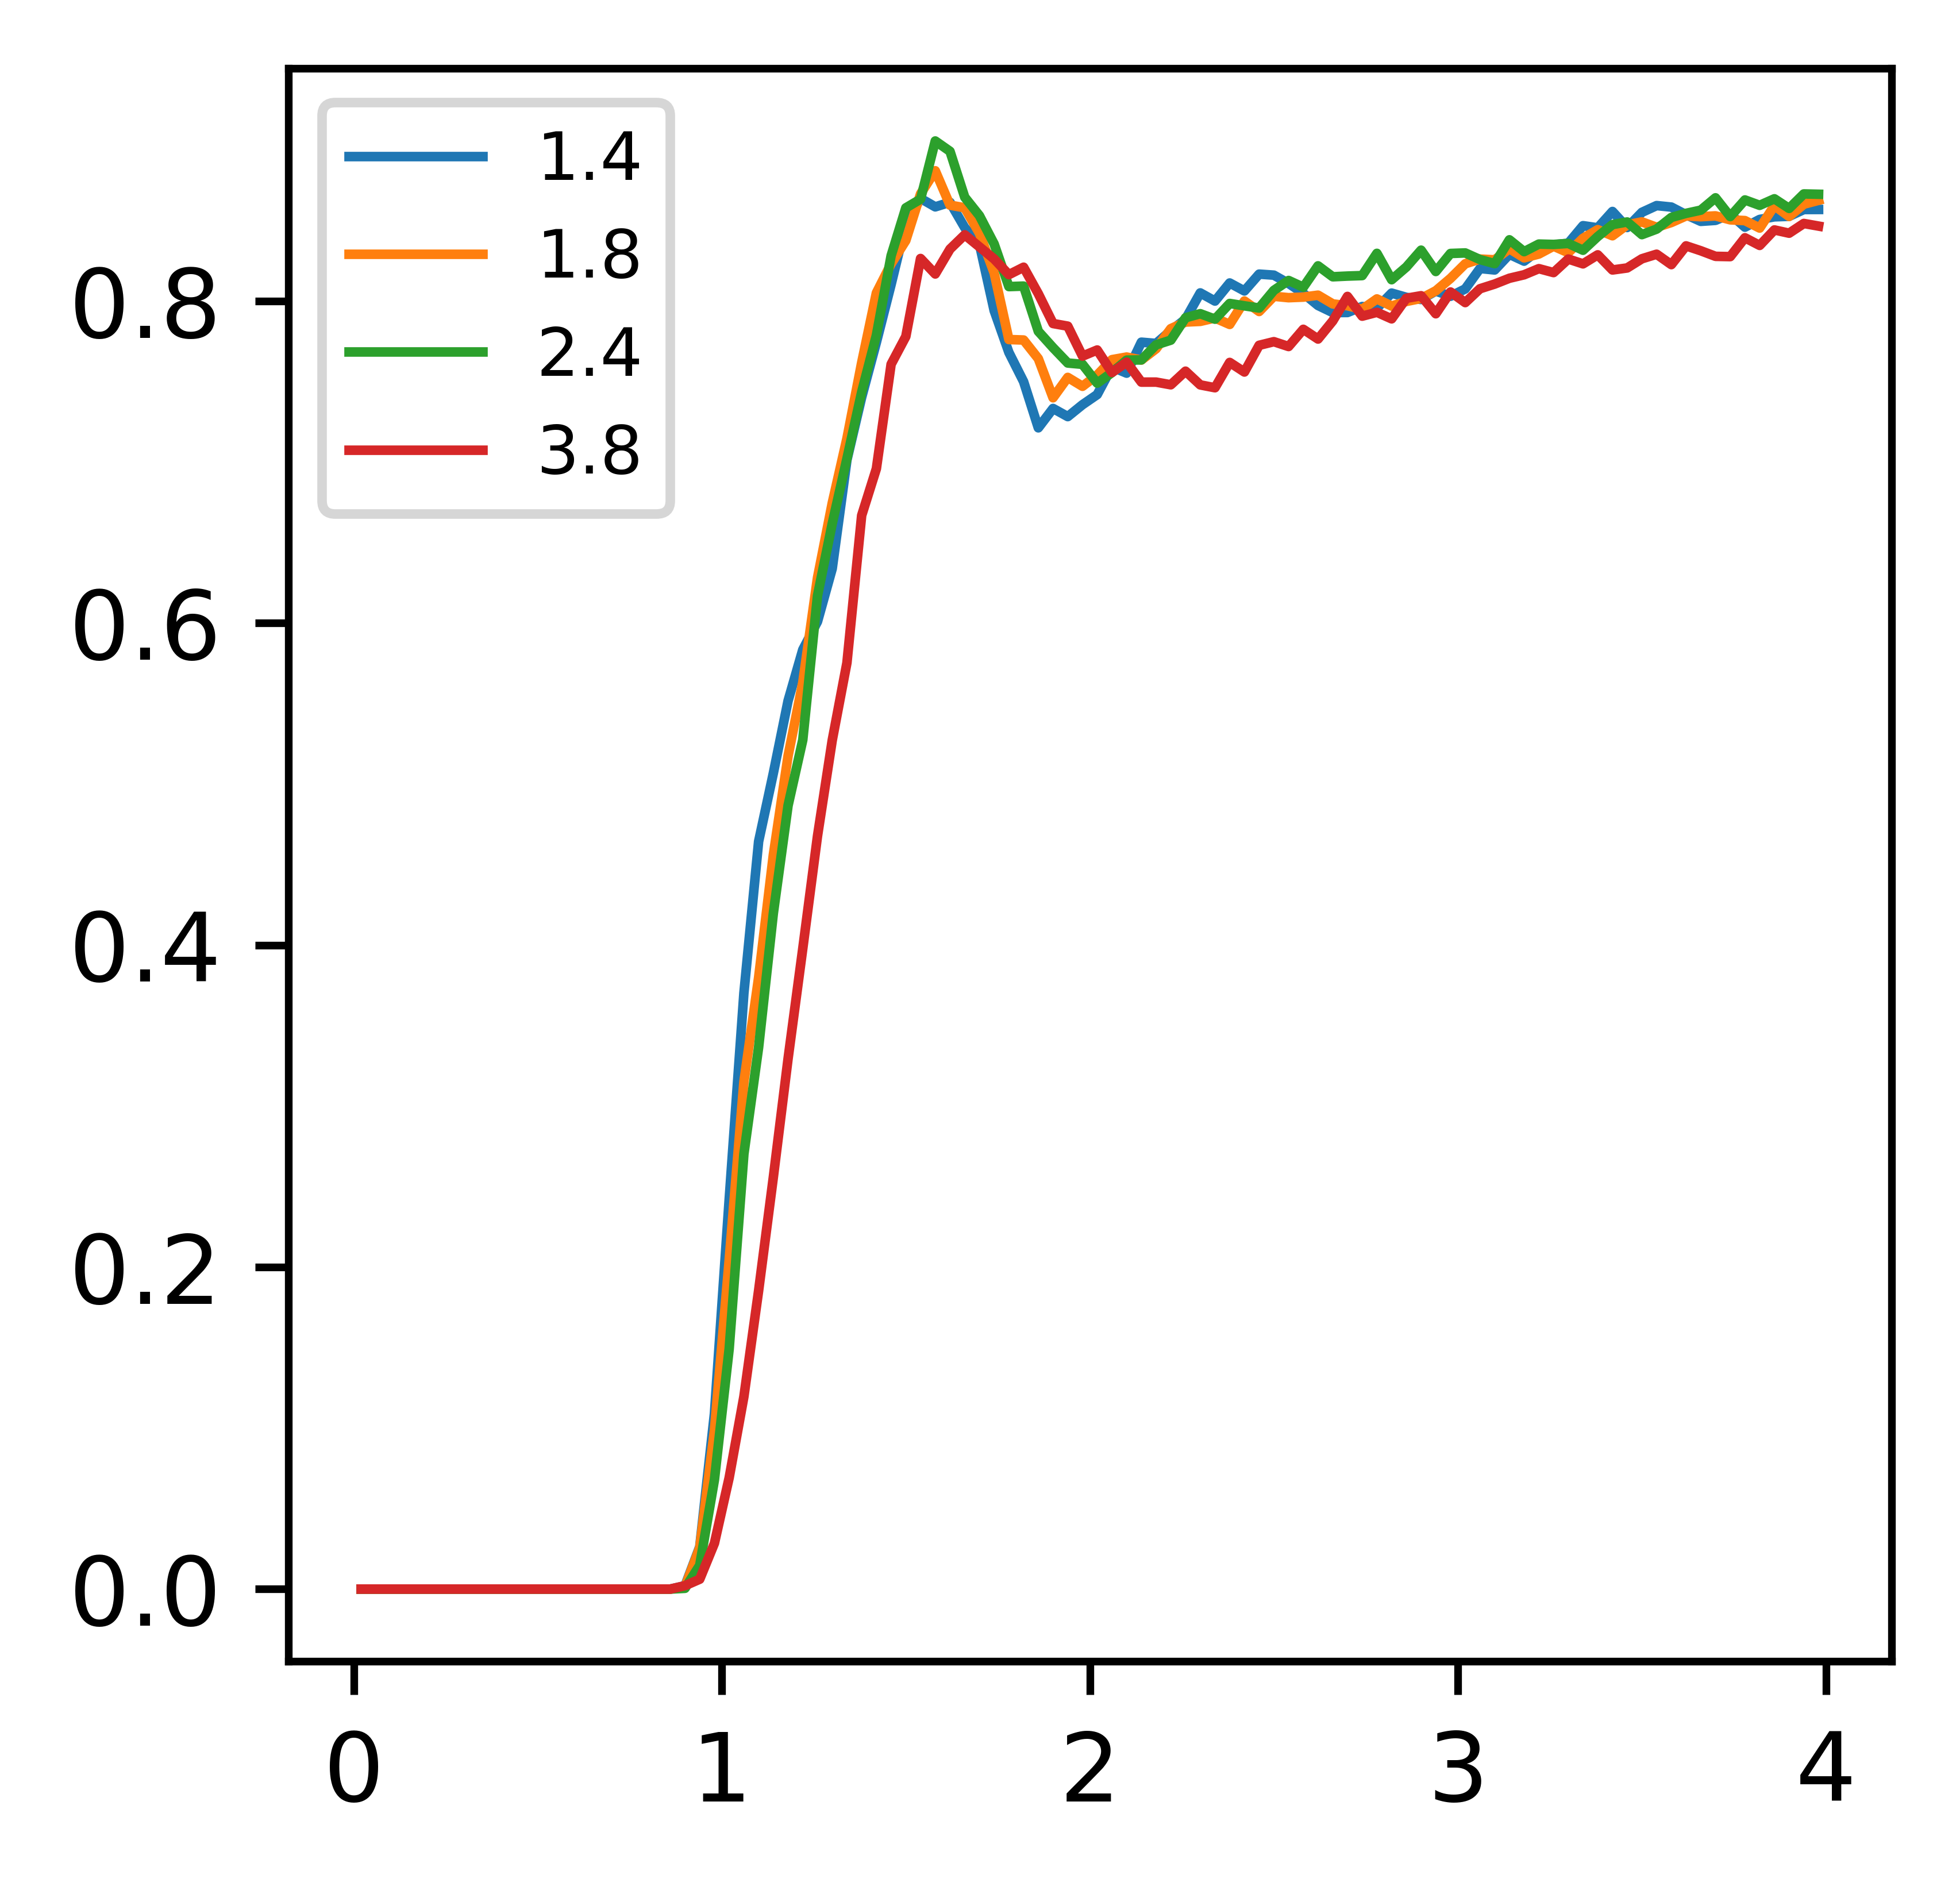

In [6]:
for kT, jobs in project.find_jobs({"doc.nvt_equilibrated": True, "sigma_scale": 0.955}).groupby("kT"):
    if kT not in [1.4, 1.8, 2.4, 3.8]:
        continue
    for job in jobs:
        fpath = job.fn("cg-nvt.gsd")
        rdf, N = gsd_rdf(gsdfile=fpath, start=-50, stop=-1, A_name="A", B_name="A", r_max=4, exclude_bonded=True)
        plt.plot(rdf.bin_centers, rdf.rdf*N, label=kT)

plt.legend()